In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import os

name = 'Sathwika'

In [ ]:
#WITHOUT MASK
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=name+'_without_mask.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Take picture without mask';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to Sathwika_without_mask.jpg


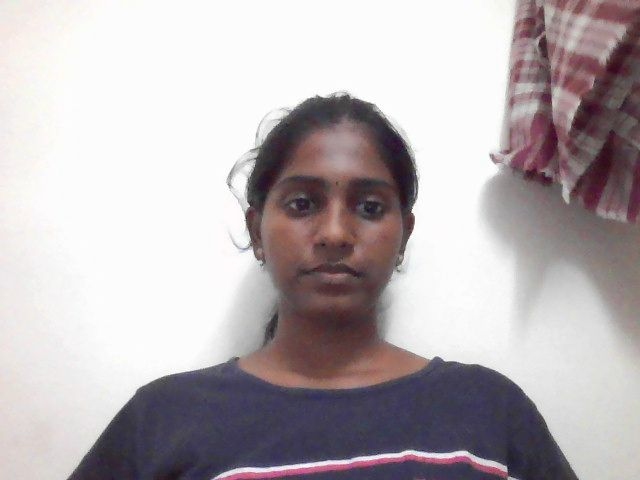

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


<IPython.core.display.Javascript object>

Saved to Sathwika_with_mask.jpg


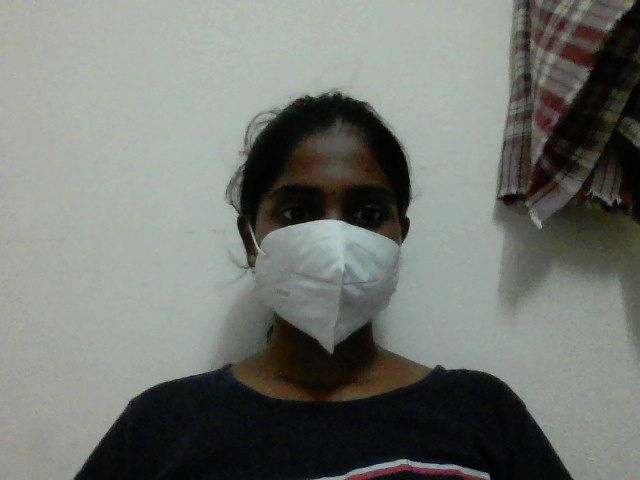

In [ ]:
"""Requirement: 1 PICTURE WITH A FACEMASK AND 1 WITHOUT A FACEMASK
Use one of the 2 methods given below
Method 1 : Upload pictures from local storage.
Method 2: Take pictures by running the next 2 cells
For best results make sure the input images are similar to these:
*   [Without mask](https://github.com/shreyas-bk/Personal_Face_Mask_Detection_V3/blob/master/Shreyas_without_mask%20(1).jpg)
*   [With mask](https://github.com/shreyas-bk/Personal_Face_Mask_Detection_V3/blob/master/Shreyas_with_mask%20(1).jpg)
WITHOUT MASK
"""

"""WITH MASK"""

#WITH MASK
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=name+'_with_mask.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Take picture with mask';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


In [ ]:

"""*Approach*
*   First model works to identify if there is a mask or not. It uses the without mask dataset that was downloaded as well as augmented images of the user's without mask image for negative cases and augmented images of the user's with mask image for positive cases. However, in some cases, since the mask obscures features of the face, it may predict that someone else wearing a mask is a positive case, which shoudln't happen since it's meant to be personalized. So I made a second model which solves that. (Note: The first model is the first factor that needs to be passed in order to move to the second model.)
*   The second model takes instances of the without mask dataset as negative cases and both the user's with mask and without mask images as positive cases. So once the first factor is passed, this model makes sure that it is actually the given user with a mask. If the input passes this second factor, access is granted.
*MASK DETECTION*
Factor 1
Load data
"""

data = []
labels = []
count = 0
for imagePath in list(paths.list_images('/content/')):
  count+=1
  label = imagePath.split(os.path.sep)[-2]
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  if imagePath=='/content/'+name+'_without_mask.jpg':
    datagen = ImageDataGenerator(zoom_range=0.2,height_shift_range=40)
    i=0
    lis = []
    img = load_img(imagePath, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x, batch_size=1):
      image = img_to_array(batch[0])
      image = preprocess_input(image)
      count+=1
      label = 'without-mask'
      data.append(image)
      labels.append(label)
      i += 1
      if i >= 100:
        break
  if imagePath=='/content/'+name+'_with_mask.jpg':
    datagen = ImageDataGenerator(zoom_range=0.4,height_shift_range=40,brightness_range=[0.5,1.5])
    i=0
    lis = []
    img = load_img(imagePath, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(x, batch_size=1):
      image = img_to_array(batch[0])
      image = preprocess_input(image)
      count+=1
      label = 'with-mask'
      data.append(image)
      labels.append(label)
      i += 1
      if i >= 500:
        break
  else:
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float32")
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print('Loading complete for ',count,' images')


Loading complete for  603  images


In [ ]:
aug = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)), # 5 convolutional layers
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')>1):
      print('\nLoss too high, try rerunning cell')
      self.model.stop_training = True
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\nStopping training with accuracy of >95%")
      self.model.stop_training = True

BS = 32
EPOCHS = 20
callback = myCallback()
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
  callbacks = [callback])
tf.keras.backend.clear_session()


ValueError: ignored

In [ ]:
"""*PERSONAL DETECTION*
Factor 2
Load data
"""

person_data = []
person_labels = []
count = 0
for imagePath in list(paths.list_images('/content/')):
  count+=1
  label = 'not-self'
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  if imagePath=='/content/'+name+'_without_mask.jpg':
    for i in range(0,300):
      count+=1
      label = 'self'
      person_data.append(image)
      person_labels.append(label)
  if imagePath=='/content/'+name+'_with_mask.jpg':
    for i in range(0,300):
      count+=1
      label = 'self'
      person_data.append(image)
      person_labels.append(label)
  else:
    person_data.append(image)
    person_labels.append(label)
person_data = np.array(person_data, dtype="float32")
person_labels = np.array(person_labels)
lb = LabelBinarizer()
person_labels = lb.fit_transform(person_labels)
person_labels = to_categorical(person_labels)
print('Loading complete for ',count,' images')


Loading complete for  603  images


In [ ]:
"""Train model"""

#person_model
aug = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True,
        fill_mode='nearest')
(trainX, testX, trainY, testY) = train_test_split(person_data, person_labels,
	test_size=0.20, stratify=person_labels, random_state=42)
import tensorflow as tf
person_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)), # 4 convolutional layers
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])



ValueError: ignored

In [ ]:
from tensorflow.keras.optimizers import RMSprop

person_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')>1):
      print('\nLoss too high, try rerunning cell') # Sometimes, if intial loss is too high, it kees getting higher; running the cell again and having a smaller inital oss seems to work better
      self.model.stop_training = True
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.97):
      print("\nStopping training with accuracy of >97%")
      self.model.stop_training = True

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:


BS = 32
EPOCHS = 20
callback = myCallback()
H = person_model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
  callbacks = [callback])
tf.keras.backend.clear_session()

"""Check confidence of models"""

image = load_img('/content/'+name+'_with_mask.jpg', target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)
to_predict = []
to_predict.append(image)
to_predict = np.array(to_predict, dtype="float32")
print('Picture with mask')
print('Factor 1 confidence : ',round(max(model.predict(to_predict)[0]),3))
print('Factor 2 confidence : ',round(max(person_model.predict(to_predict)[0]),4))
image = load_img('/content/'+name+'_without_mask.jpg', target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)
to_predict = []
to_predict.append(image)
to_predict = np.array(to_predict, dtype="float32")
print('\nPicture without mask')
print('Factor 1 confidence : ',round(max(model.predict(to_predict)[0]),3))
print('Factor 2 confidence : ',round(max(person_model.predict(to_predict)[0]),4))
print('\nFactor 1 confidences should be greater than 0.95 and Factor 2 confidences should be greater than 0.98')


Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 1.6589e-09 - accuracy: 0.0000e+00

ValueError: ignored

In [ ]:

"""*TEST THE MODELS*
Set minimum confidence - default is 95% for first factor and 99% for second factor
"""

CONFIDENCE = 0.95
CONFIDENCE2 = 0.99

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      //setTimeout(() => {  console.log("World!"); }, 10000);
      //const promise = new Promise((resolve, reject) => {
      //setTimeout(() => {
       //resolve() // Change status to 'fulfilled'
      //}, 5000)
      //})
      //await promise
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename




Mask detected with  100.0 % confidence.

Details:
First factor - Passing.
Second factor - Passing.



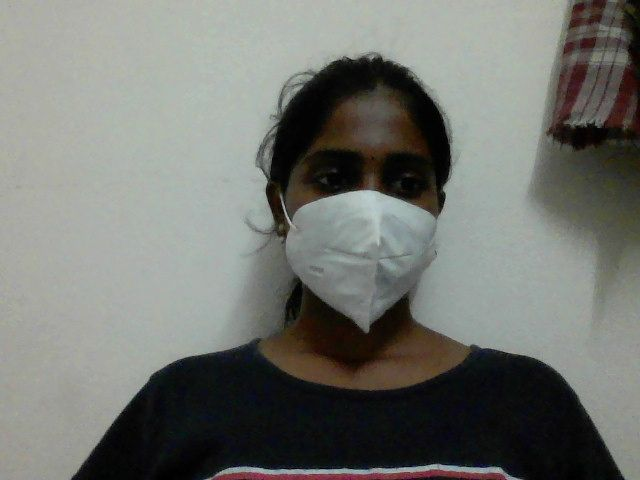

Access Granted


In [ ]:
from IPython.display import Image
from IPython.display import clear_output
import time
try:
  factor1,factor2='without mask','not self'
  print('\nWear your mask to access')
  start_flag=True
  while(factor1=='without mask' or factor2=='not self'):
    if start_flag==False:
      clear_output()
      if prelim=='with mask' and factor1=='without mask':
        print('\nMask detected with low confidence (',round((confidence-0.5)*100,2),'%). Try coming closer to the camera and making sure the mask is covering your nose.')
      if factor1=='without mask' and prelim=='without mask':
        print('\nNo mask detected - Please wear a mask over your nose and mouth.')
      print('\nDetails:\nFirst factor - ','Passing' if factor1=='with mask' else 'Failing',('\nSecond factor - ','Passing\n' if factor2=='self' else 'Failing\n') if factor1=='with mask' else '\n')
    filename = take_photo()
    image = load_img('/content/photo.jpg', target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    to_predict = []
    to_predict.append(image)
    to_predict = np.array(to_predict, dtype="float32")
    factor1 = 'without mask' if model.predict(to_predict)[0][0]<CONFIDENCE else 'with mask'
    prelim = 'without mask' if model.predict(to_predict)[0][0]<0.5 else 'with mask'
    confidence = max(model.predict(to_predict)[0])
    factor2 = 'not self' if person_model.predict(to_predict)[0][1]<CONFIDENCE2 else 'self'
    start_flag=False
  clear_output()
  print('\n\nMask detected with ',round(confidence*100,2),'% confidence.\n\nDetails:\nFirst factor - Passing.\nSecond factor - Passing.\n')
  display(Image(filename))
  print('Access Granted')
except Exception as err:
  print(str(err))



Mask detected with  100.0 % confidence.

Details:
First factor - Passing.
Second factor - Passing.



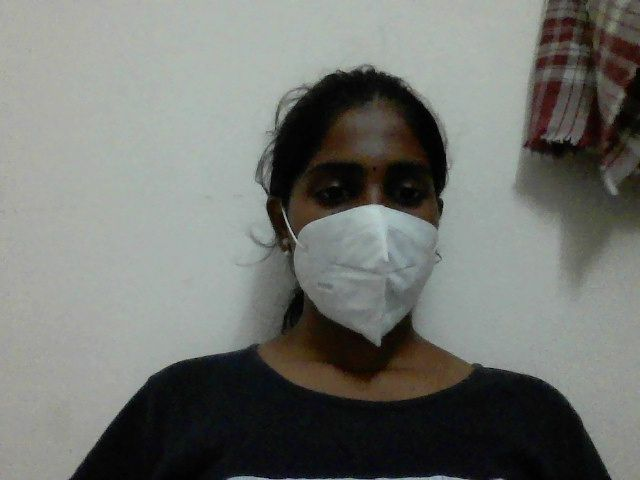

Access Granted


In [ ]:
from IPython.display import Image
from IPython.display import clear_output
import time
try:
  factor1,factor2='without mask','not self'
  print('\nWear your mask to access')
  start_flag=True
  while(factor1=='without mask' or factor2=='not self'):
    if start_flag==False:
      clear_output()
      if prelim=='with mask' and factor1=='without mask':
        print('\nMask detected with low confidence (',round((confidence-0.5)*100,2),'%). Try coming closer to the camera and making sure the mask is covering your nose.')
      if factor1=='without mask' and prelim=='without mask':
        print('\nNo mask detected - Please wear a mask over your nose and mouth.')
      print('\nDetails:\nFirst factor - ','Passing' if factor1=='with mask' else 'Failing',('\nSecond factor - ','Passing\n' if factor2=='self' else 'Failing\n') if factor1=='with mask' else '\n')
    filename = take_photo()
    image = load_img('/content/photo.jpg', target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    to_predict = []
    to_predict.append(image)
    to_predict = np.array(to_predict, dtype="float32")
    factor1 = 'without mask' if model.predict(to_predict)[0][0]<CONFIDENCE else 'with mask'
    prelim = 'without mask' if model.predict(to_predict)[0][0]<0.5 else 'with mask'
    confidence = max(model.predict(to_predict)[0])
    factor2 = 'not self' if person_model.predict(to_predict)[0][1]<CONFIDENCE2 else 'self'
    start_flag=False
  clear_output()
  print('\n\nMask detected with ',round(confidence*100,2),'% confidence.\n\nDetails:\nFirst factor - Passing.\nSecond factor - Passing.\n')
  display(Image(filename))
  print('Access Granted')
except Exception as err:
  print(str(err))





